<a href="https://colab.research.google.com/github/LeoSotoG/Bank-Customer-Churn-Prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyect**

El conjunto de datos contiene información sobre clientes bancarios que abandonaron el banco o continúan siendo clientes. Y se planteara un modelo  de rotación de clientes. El modelo de predicción de rotación de clientes bancarios se utiliza para prever qué clientes tienen más probabilidades de abandonar el banco en el futuro.  

##Column Information
El conjunto de datos incluye los siguientes atributos:

* **Customer ID:** Un identificador único para cada cliente.
* **Surname:** El apellido o apellido del cliente.
* **Credit Score:** Un valor numérico que representa la puntuación crediticia del cliente.
* **Geography:** El país donde reside el cliente (Francia, España o Alemania).
* **Gender:** El género del cliente (Masculino o Femenino).
* **Age:** La edad del cliente.
* **Tenure:** El número de años que el cliente ha estado con el banco.
* **Balance:** El saldo de la cuenta del cliente.
* **NumOfProducts:** El número de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorro, tarjeta de crédito).
* **HasCrCard:** Si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no).
* **IsActiveMember:** Si el cliente es un miembro activo (1 = sí, 0 = no).
* **EstimatedSalary:** El salario estimado del cliente.
* **Exited:** Si el cliente ha abandonado (1 = sí, 0 = no).

##Load libraries

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Para imputación
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency

# Para el preprocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Para modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Configurar pandas para mostrar números en formato estándar
pd.options.display.float_format = "{:.2f}".format

##Load Data

In [156]:
data = pd.read_csv("Churn_Modelling.csv")

In [157]:
data.shape

(10002, 14)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [159]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [160]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.00,10002.00,10002.00,10001.00,10002.00,10002.00,10002.00,10001.00,10001.00,10002.00,10002.00
mean,5001.50,15690933.45,650.56,38.92,5.01,76491.11,1.53,0.71,0.51,100083.33,0.20
std,2887.47,71931.77,96.66,10.49,2.89,62393.47,0.58,0.46,0.50,57508.12,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2501.25,15628524.75,584.00,32.00,3.00,0.00,1.00,0.00,0.00,50983.75,0.00
50%,5001.50,15690732.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100185.24,0.00
75%,7501.75,15753225.50,718.00,44.00,7.00,127647.84,2.00,1.00,1.00,149383.65,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [161]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1.00,1.00,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0.00,1.00,112542.58,0
2,3,15619304,Onio,502,France,Female,42.00,8,159660.80,3,1.00,0.00,113931.57,1
3,4,15701354,Boni,699,France,Female,39.00,1,0.00,2,0.00,0.00,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,NaN,1.00,79084.10,0


In [162]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.00,7,0.00,1,0.00,1.00,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.00,3,75075.31,2,1.00,0.00,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.00,3,75075.31,2,1.00,0.00,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.00,4,130142.79,1,1.00,0.00,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.00,4,130142.79,1,1.00,0.00,38190.78,0


##Data processing

* **Customer ID:** Si bien es un identificador único para cada cliente, no proporciona información significativa sobre el comportamiento del cliente ni sobre los factores que podrían influir en su decisión de abandonar el banco. Por lo tanto, incluirlo en el modelo probablemente no mejorarí­a su capacidad predictiva y podría incluso introducir ruido en los datos.
* **Surname:** El apellido del cliente tampoco suele ser relevante para predecir la rotación de clientes. Al igual que el ID del cliente, el apellido no proporciona información directa sobre las características o el comportamiento del cliente que podrían estar relacionadas con la rotación. Por lo tanto, tampoco suele incluirse en el modelo.

###Split variables

In [163]:
categorical_features = ["Geography", "Gender"]

In [164]:
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

###Imputation of null data

**Variables nulas categoricas**

In [165]:
# Variables a imputar categoricas
vc_nulas = ["Geography"]

In [166]:
# Definir imputador por moda
imputer = SimpleImputer(strategy = "most_frequent")

In [167]:
for column in vc_nulas:
  X = data[[column]]
  Xi = pd.DataFrame(imputer.fit_transform(X), columns = [column])
  # Creamos una tabla de contingencia
  tabla_contingencia = pd.crosstab(X[column].dropna(), Xi[column])
  # Aplicamos la prueba de Chi-cuadrado
  chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)
  #Decision
  if p_valor < 0.05:
    print(f"La imputación en la columna {column} fue correcta")
    # Haciendo la imputacion en el DataFrame original
    imputed_values = imputer.transform(data[[column]].copy())
    imputed_df = pd.DataFrame(imputed_values, columns=[column], index=data.index)
    data[column] = imputed_df
  else:
    print(f"La imputación en la columna {column} NO fue correcta")

La imputación en la columna Geography fue correcta


**Variables nulas numericas (Prueba de Kolmogorov-Smirnov)**

In [168]:
# Variable a imputar numericas
vn_nulas = ["Age", "HasCrCard","IsActiveMember"]

In [169]:
# Definir imputador por promedio
im = SimpleImputer(strategy = "mean")

Prueba de Kolmogorov-Smirnov

In [170]:
for col in vn_nulas:
  # Descargando la columna
  X = data[[col]]
  # Imputando los datos
  Xi = pd.DataFrame(im.fit_transform(X), columns=[col])
  #Estadistico de prueba
  if ks_2samp(X[col].dropna(),Xi[col]).statistic < 0.1:
    print(f"La imputación en la columna {col} fue correcta")
    # Haciendo la imputacion en el DataFrame original
    data[col] = im.transform(data[[col]].copy())
  else:
    print(f"La imputación en la columna {col} NO fue correcta")


La imputación en la columna Age fue correcta
La imputación en la columna HasCrCard fue correcta
La imputación en la columna IsActiveMember fue correcta


In [171]:
data["Age"].isnull().sum()

0

###Outliers

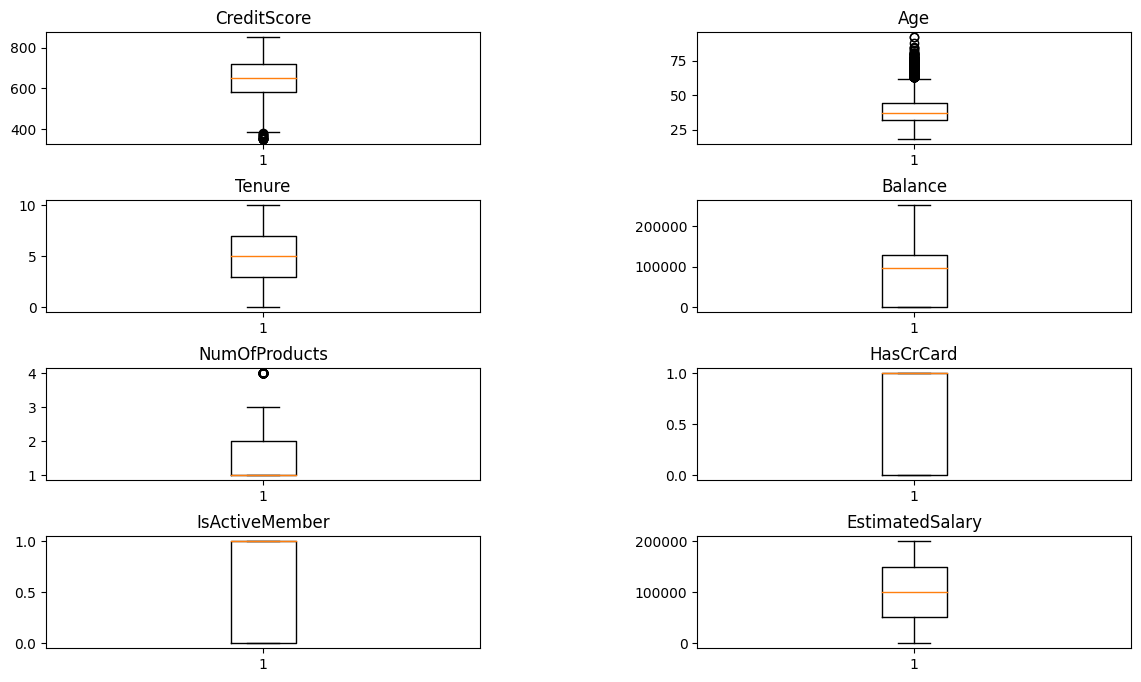

In [172]:
# Definiendo una figura para ver las subfiguras e identificar si cuenta con outliers
fig = plt.figure(figsize=(14, 8))

# Agregando las subfiguras
for i, col in enumerate(numerical_features):
  ax = fig.add_subplot(4, 2, i+1)
  ax.boxplot(data[col])
  ax.set_title(col)

# Ajustar espacio entre subfiguras
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

####IQR

In [173]:
# Variables a imputar
var_outliers = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

numerical_data = data[numerical_features]

In [174]:
# Quantile 1 y 3
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)

# Obteniendo el IQR
IQR = Q3 - Q1

# Inicializar una máscara para todas las filas
mask_total = pd.Series(True, index=data.index)

# Calcular y combinar las máscaras para cada columna
for col in var_outliers:
    mask = ~((numerical_data[col] < (Q1[col] - 1.5 * IQR[col])) | (numerical_data[col] > (Q3[col] + 1.5 * IQR[col])))
    # Alinear las máscaras para asegurarse de que tengan el mismo índice
    mask = mask.reindex(mask_total.index, fill_value=False)
    # Combinar las máscaras
    mask_total &= mask

len(numerical_data), len(numerical_data[mask_total])
# Se perdieron 432 datos

(10002, 9570)

In [175]:
# Aplicando estos cambios
data = data[mask_total]
data.shape

(9570, 14)

##Exploratory Analysis

###Univariate Analysis

**Variables numericas**

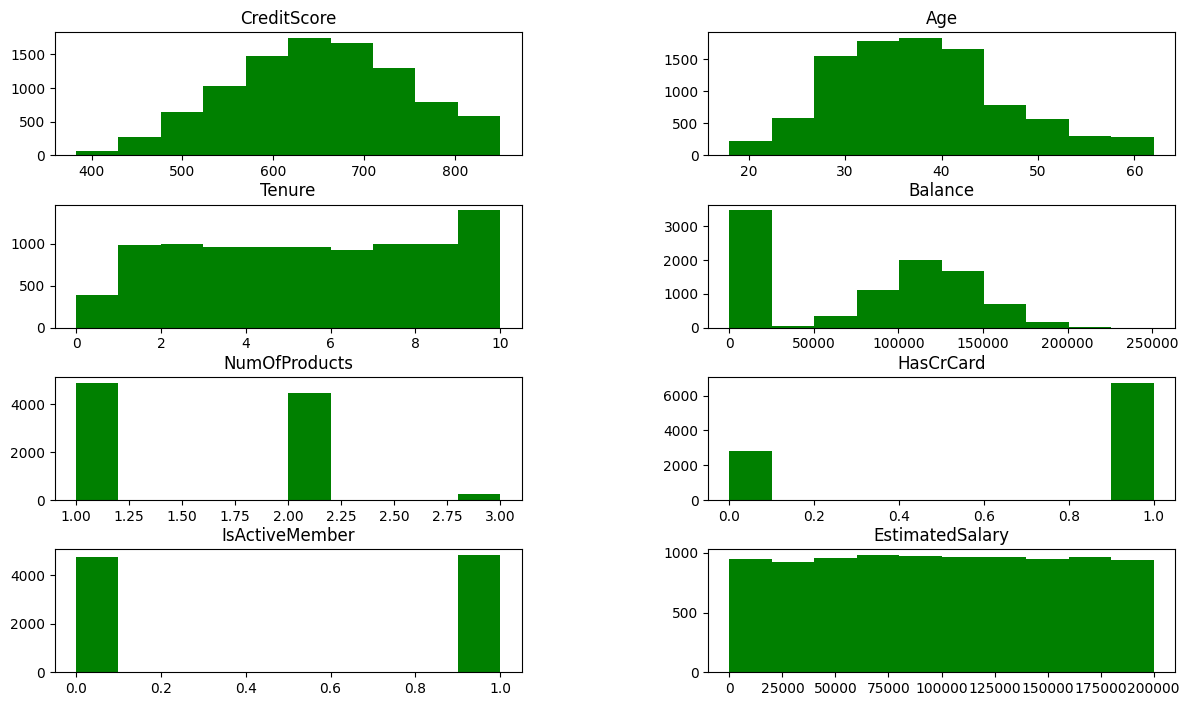

In [176]:
# Definiendo una figura para ver las subfiguras y visualizar los histogramas
fig = plt.figure(figsize=(14, 8))

# Agregando las subfiguras
for i, col in enumerate(numerical_features):
  ax = fig.add_subplot(4, 2, i+1)
  ax.hist(data[col], color="green")
  ax.set_title(col)

# Ajustando los espacios entre las subfiguras
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

**Variables categoricas**

In [177]:
def graficar_var_discretas(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            plt.figure(figsize=(4, 3))
            df[column].value_counts().plot(kind="bar", color="blue")
            plt.title(f'Gráfico de barras para {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45)
            plt.show()

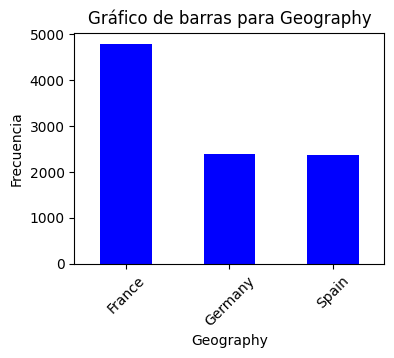

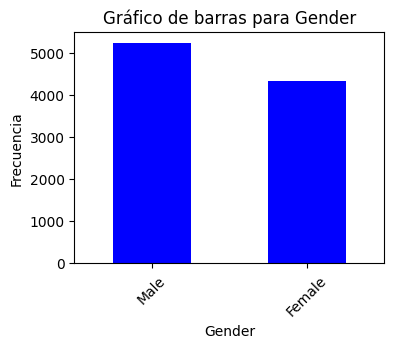

In [178]:
graficar_var_discretas(data[categorical_features])

###Bivariate Analysis

####Heatmap

In [179]:
# Descargar en una variable la matriz de correlación
matriz_Corr = numerical_data.corr()
matriz_Corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00


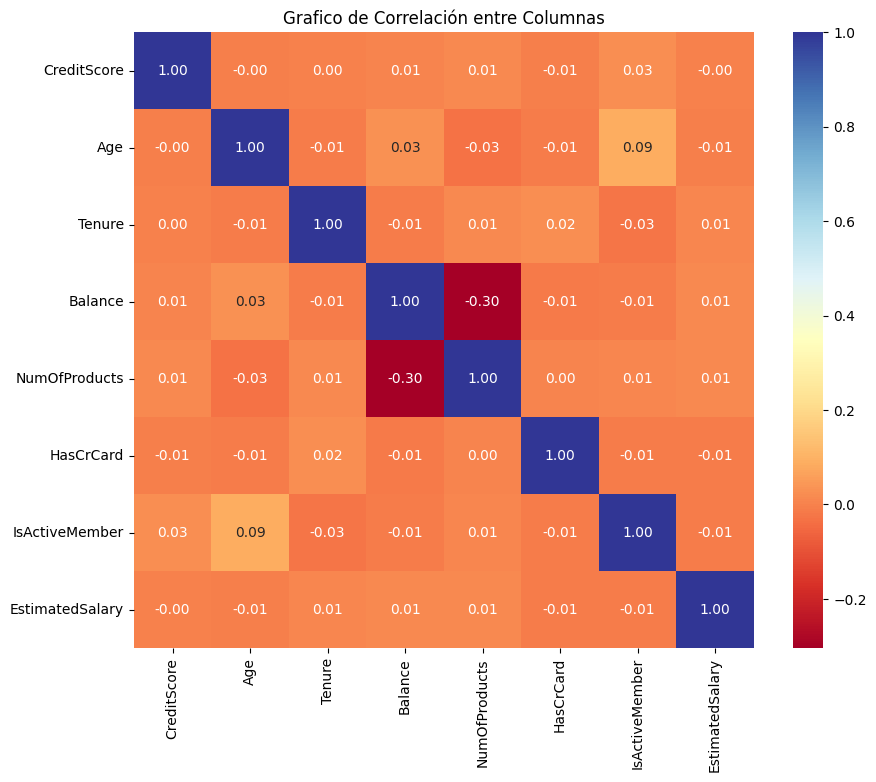

In [180]:
# Grafico de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_Corr, annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Grafico de Correlación entre Columnas")
plt.show()

##Preprocess Data

###One Hot encoding

In [181]:
numerical_data = data[numerical_features]
categorical_data = data[categorical_features]

In [182]:
# Creamos un codificador One-Hot
encoder = OneHotEncoder()

In [183]:
encoder.fit(categorical_data)

OneHotEncoder()

In [184]:
# Ajustamos y transformamos los datos categóricos utilizando One-Hot Encoding
encoded_data = encoder.fit_transform(categorical_data)
encoded_data

<9570x5 sparse matrix of type '<class 'numpy.float64'>'
	with 19140 stored elements in Compressed Sparse Row format>

In [185]:
# Convertir la matriz sparse resultante en un DataFrame de pandas y nombrar las columnas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))

In [186]:
encoded_df.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.00,0.00,0.00,1.00,0.00
1,0.00,0.00,1.00,1.00,0.00
2,1.00,0.00,0.00,1.00,0.00
3,1.00,0.00,0.00,1.00,0.00
4,0.00,0.00,1.00,1.00,0.00


In [187]:
encoded_df.columns

Index(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

###Scaler

In [188]:
# Definiendo el escalador
scaler = StandardScaler()
scaler.fit(numerical_data)

StandardScaler()

In [189]:
# Escalando datos numericos
numerical_data_preprocessed = scaler.fit_transform(numerical_data)

# Escalando datos categoricos
categorical_data_preprocessed = scaler.fit_transform(encoded_df)

In [190]:
# Concatenando los datos numericos y categoricos escalados
tab = pd.concat([pd.DataFrame(numerical_data_preprocessed), pd.DataFrame(categorical_data_preprocessed)], axis=1)

In [191]:
tab

,0,1,2,3,4,5,6,7,0,1,2,3,4
0,-0.33,0.49,-1.04,-1.22,-0.94,0.65,0.99,0.02,1.00,-0.58,-0.57,1.10,-1.10
1,-0.44,0.37,-1.39,0.12,-0.94,-1.55,0.99,0.22,-1.00,-0.58,1.74,1.10,-1.10
2,-1.55,0.49,1.03,1.33,2.70,0.65,-1.01,0.24,1.00,-0.58,-0.57,1.10,-1.10
3,0.50,0.14,-1.39,-1.22,0.88,-1.55,-1.01,-0.11,1.00,-0.58,-0.57,1.10,-1.10
4,2.07,0.60,-1.04,0.79,-0.94,0.00,0.99,-0.37,-1.00,-0.58,1.74,1.10,-1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,0.61,-0.20,0.69,-1.22,-0.94,-1.55,0.99,-1.01,1.00,-0.58,-0.57,1.10,-1.10
9566,1.26,0.49,-0.70,-0.02,0.88,0.65,-1.01,-0.13,-1.00,1.73,-0.57,-0.91,0.91
9567,1.26,0.49,-0.70,-0.02,0.88,0.65,-1.01,-0.13,-1.00,1.73,-0.57,-0.91,0.91
9568,1.47,-1.11,-0.35,0.86,-0.94,0.65,-1.01,-1.08,1.00,-0.58,-0.57,1.10,-1.10


In [192]:
# Asiganando de nuevo los nombres de las columnas
tab.columns = ["CreditScore", "Age", "Tenure", "Balance",
       "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary",
       "Geography_France", "Geography_Germany", "Geography_Spain",
       "Gender_Female", "Gender_Male"]

In [193]:
tab.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.33,0.49,-1.04,-1.22,-0.94,0.65,0.99,0.02,1.00,-0.58,-0.57,1.10,-1.10
1,-0.44,0.37,-1.39,0.12,-0.94,-1.55,0.99,0.22,-1.00,-0.58,1.74,1.10,-1.10
2,-1.55,0.49,1.03,1.33,2.70,0.65,-1.01,0.24,1.00,-0.58,-0.57,1.10,-1.10
3,0.50,0.14,-1.39,-1.22,0.88,-1.55,-1.01,-0.11,1.00,-0.58,-0.57,1.10,-1.10
4,2.07,0.60,-1.04,0.79,-0.94,0.00,0.99,-0.37,-1.00,-0.58,1.74,1.10,-1.10


##Train, Test, Split

In [194]:
# Definiendo la target
y = data["Exited"]
y

0        1
1        0
2        1
3        0
4        0
        ..
9997     1
9998     1
9999     1
10000    0
10001    0
Name: Exited, Length: 9570, dtype: int64

In [195]:
# Obteniendo datos de Entrenamiento y prueba
train, test, train_y, test_y =  train_test_split(tab, y,
                                        test_size = 0.30)

##Model Data

**Funcion para buscar los hiperparametros de los modelos y encontrar los optimos, utiliza programación paralela.**

In [196]:
def entrenar(param, modelo, X, y):
    # Inicia una búsqueda aleatoria de hiperparámetros
    grid = RandomizedSearchCV(param_distributions=param,
                              # Utiliza todos los núcleos disponibles para procesamiento paralelo
                              n_jobs=-1,
                              # Número de iteraciones de búsqueda aleatoria
                              n_iter=10,
                              # Número de divisiones para la validación cruzada
                              cv=4,
                              # Estimador del modelo a utilizar
                              estimator=modelo,
                              # Cómo manejar errores durante el ajuste del modelo
                              error_score='raise')

    # Ajusta el modelo utilizando búsqueda aleatoria de hiperparámetros
    grid.fit(X, y)

    # Retorna los resultados de la búsqueda, el mejor estimador, el mejor puntaje, y los mejores parámetros
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_


In [197]:
def metricas(Xt, Xv, yt, yv, modelo):
    # Define una función llamada metricas que toma como entrada los conjuntos de datos de entrenamiento (Xt, yt),
    # los conjuntos de datos de validación (Xv, yv) y el modelo entrenado (modelo).

    d = {'train': round(roc_auc_score(y_true=yt, y_score=modelo.predict_proba(Xt)[:,1]), 3),
         # Calcula el área bajo la curva ROC (AUC) para el conjunto de entrenamiento
         # y lo almacena en un diccionario con la clave 'train'.
         # Utiliza predict_proba para obtener las probabilidades predichas y selecciona la columna correspondiente
         # al valor positivo (columna 1) para calcular el AUC.

         'validate': round(roc_auc_score(y_true=yv, y_score=modelo.predict_proba(Xv)[:,1]), 3)
         # Calcula el área bajo la curva ROC (AUC) para el conjunto de validación
         # y lo almacena en un diccionario con la clave 'validate'.
         # Utiliza predict_proba para obtener las probabilidades predichas y selecciona la columna correspondiente
         # al valor positivo (columna 1) para calcular el AUC.
        }
    return d
    # Retorna el diccionario que contiene los valores de AUC para los conjuntos de entrenamiento y validación.


###KNN

In [211]:
# Parametros del modelo KNN
paramknn = dict(n_neighbors= (range(2, 4)),  # Número de vecinos a considerar
          weights=["uniform", "distance"],  # Método de ponderación de los vecinos
          metric= ["euclidean", "manhattan"],  # Métrica de distancia utilizada
          algorithm= ["auto", "ball_tree", "kd_tree", "brute"],  # Algoritmo utilizado para calcular los vecinos más cercanos
          p= [1, 2]  # Parámetro de potencia para la distancia de Minkowski
          )

In [212]:
# Definiendo el calsificador
modelo = KNeighborsClassifier()
modelo, best_estimator, score, params = entrenar(paramknn, modelo, train, train_y)
metricas(train,test,train_y,test_y,modelo)

{'train': 0.966, 'validate': 0.715}

In [200]:
best_estimator

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

###RandomForestClassifier

In [201]:
param_rf = dict(n_estimators=list(range(1, 100)),                 # Define una lista de valores para el número de árboles en el bosque
                criterion=['gini', 'entropy'],                        # Define los criterios de medida para la calidad de la división
                max_depth=[x for x in list(range(2, 5))] + [None],    # Define la profundidad máxima de los árboles
                min_samples_split=[x for x in list(range(2, 4))],     # Define el número mínimo de muestras requeridas para dividir un nodo interno
                min_samples_leaf=[x for x in list(range(2, 4))],      # Define el número mínimo de muestras requeridas para ser un nodo hoja
                max_features=[None] + [i * .05 for i in list(range(2, 4))],  # Define el número máximo de características a considerar para la mejor división
                max_leaf_nodes=list(range(2, 10)) + [None],           # Define el número máximo de nodos hoja permitidos en cada árbol
                min_impurity_decrease=[x * .10 for x in list(range(2, 4))],  # Define la cantidad mínima de reducción de impureza requerida para dividir un nodo
                oob_score=[True,False],                               # Indica si se debe usar el error fuera de la bolsa para estimar el rendimiento del modelo
                warm_start=[True, False],                             # Indica si se debe reutilizar la solución de la llamada anterior y agregar más estimadores a la misma
                class_weight=[None, 'balanced'],                      # Define el peso asociado a cada clase en el cálculo de la importancia del nodo
                max_samples=[None],)

In [202]:
# Definiendo el calsificador
modelo_rf = RandomForestClassifier()
modelo, best_estimator, score, params = entrenar(param_rf, modelo_rf, train, train_y)
metricas(train,test,train_y,test_y,modelo)

{'train': 0.5, 'validate': 0.5}

In [203]:
best_estimator

RandomForestClassifier(max_features=0.15000000000000002, max_leaf_nodes=4,
                       min_impurity_decrease=0.30000000000000004,
                       min_samples_leaf=3, min_samples_split=3, n_estimators=26,
                       oob_score=True, warm_start=True)

###SVC

In [204]:
param_svc = dict(C = np.arange(0.1,2,0.1),  # Define una lista de valores para el parámetro de regularización C, que va desde 0.1 hasta 2 en incrementos de 0.1
                 kernel = ['linear','poly','rbf','sigmoid'],  # Define los kernels utilizados en el algoritmo SVM: lineal, polinomial, radial y sigmoide
                 degree = range(2,6),       # Define los grados de los polinomios para el kernel polinomial, desde 2 hasta 5
                 gamma = ['scale','auto'],  # Define los valores para el parámetro gamma, que controla la influencia de un solo ejemplo de entrenamiento, 'scale' y 'auto' son dos métodos diferentes para calcular gamma
                 probability = [True])      # Define si se deben calcular las probabilidades de clasificación para SVC

In [205]:
modelo_svc = SVC()
modelo, best_estimator, score, params = entrenar(param_svc, modelo_svc, train, train_y)
metricas(train,test,train_y,test_y,modelo)

{'train': 0.861, 'validate': 0.828}

###LogisticRegression

In [206]:
param_logreg = dict(penalty = ['l1', 'l2'],  # Define la norma utilizada en la regularización: l1 (valor absoluto) y l2 (cuadrado)
                     C = np.arange(0.1, 2, 0.1),  # Define una lista de valores para el parámetro de regularización C, que va desde 0.1 hasta 2 en incrementos de 0.1
                     solver = ['liblinear', 'saga'],  # Define los solvers utilizados para optimizar la función de coste: 'liblinear' para problemas pequeños y 'saga' para problemas grandes
                     max_iter = [100, 200, 300],  # Define el número máximo de iteraciones
                     random_state = [42]  # Define una semilla aleatoria para reproducibilidad
                    )

In [207]:
modelo_LR = LogisticRegression()
modelo, best_estimator, score, params = entrenar(param_logreg, modelo_LR, train, train_y)
metricas(train,test,train_y,test_y,modelo)

{'train': 0.798, 'validate': 0.778}

In [208]:
best_estimator

LogisticRegression(C=0.1, max_iter=200, random_state=42, solver='saga')

##Conclusions

Los modelos que se podrian implementar serian:
* **SVC**
* **LogisticRegression**